<a href="https://colab.research.google.com/github/allisson2156/Analise-Suicidios-Shangdong/blob/main/AnaliseDadosShangDong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [74]:
df = pd.read_csv('SuicideChina.csv')
df.head()

,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [ ]:
df.info()

,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [75]:
#Verificando a existência de valores nulos
df.isna().sum()

Unnamed: 0      0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
dtype: int64

In [76]:
#Excluindo colunas desnecessárias 
df.drop(['Unnamed: 0', 'Person_ID'], axis = 1, inplace = True)

In [77]:
#Contando os valores das colunas 
print(df['Hospitalised'].value_counts())
print('-'*30)
print(df['Died'].value_counts())
print('-'*30)
print(df['Urban'].value_counts())
print('-'*30)
print(df['Education'].value_counts())
print('-'*30)
print(df['Occupation'].value_counts())
print('-'*30)
print(df['method'].value_counts())

yes    1553
no     1018
Name: Hospitalised, dtype: int64
------------------------------
no     1315
yes    1256
Name: Died, dtype: int64
------------------------------
no         2213
yes         277
unknown      81
Name: Urban, dtype: int64
------------------------------
Secondary    1280
primary       659
iliterate     533
unknown        80
Tertiary       19
Name: Education, dtype: int64
------------------------------
farming             2032
household            248
others/unknown       156
professional          37
student               35
unemployed            30
business/service      21
worker                 6
others                 3
retiree                3
Name: Occupation, dtype: int64
------------------------------
Pesticide        1768
Hanging           431
Other poison      146
Poison unspec     107
unspecified        48
Cutting            29
Drowning           26
Jumping            15
Others              1
Name: method, dtype: int64


In [17]:
#Média de idade por ano 
dfGroupedAge = df.groupby('Year')['Age'].mean().round(0)
print(dfGroupedAge)

Year
2009    53.0
2010    53.0
2011    52.0
Name: Age, dtype: float64


In [82]:
#Média de maior indice em mês por ano 
dfGroupedDeit = df.groupby('Year')['Month'].mean().round()
print(dfGroupedDeit)

Year
2009    6.0
2010    6.0
2011    6.0
Name: Month, dtype: float64


Text(0.5, 1.0, 'Idade das Vitimas')

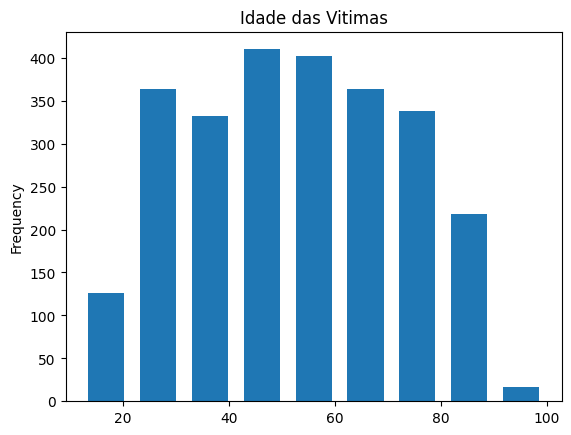

In [44]:
df['Age'].plot(kind='hist', bins=9, rwidth = 0.7, linewidth=0.5)
plt.title('Idade das Vitimas')

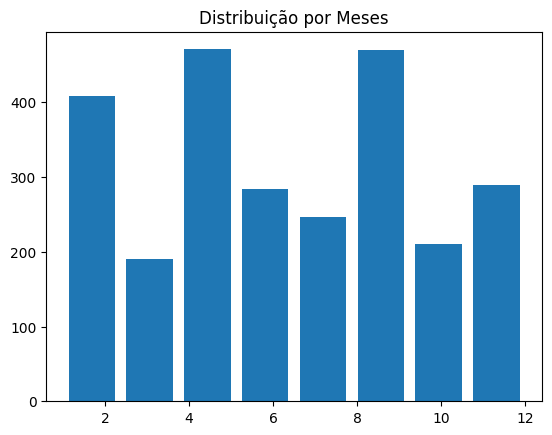

In [70]:
plt.hist(df['Month'], bins = 8, rwidth = 0.8, linewidth = 0.5) 
plt.title('Distribuição por Meses')
plt.show()

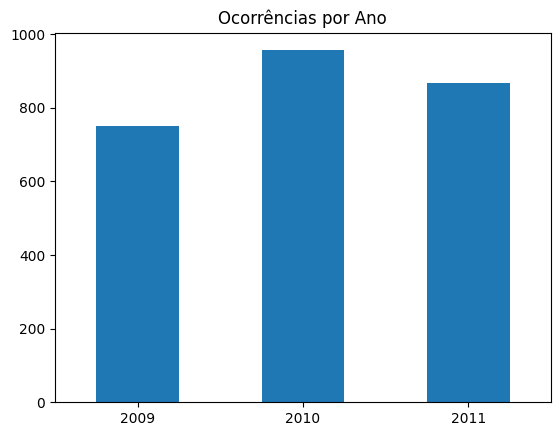

In [41]:
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Ocorrências por Ano')
plt.xticks(rotation = 0)
plt.show()

Text(0.5, 1.0, 'Mortes por Sexo')

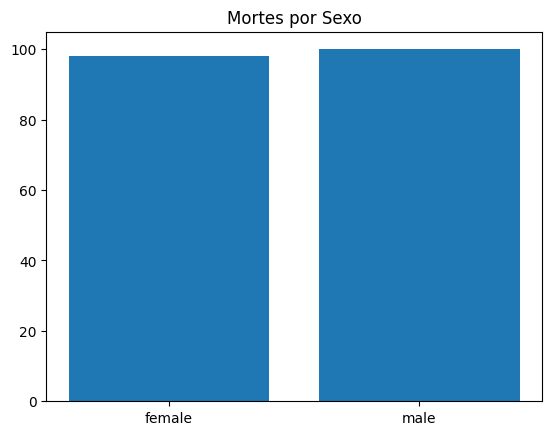

In [67]:
plt.bar(df['Sex'], df['Age']) 
plt.title('Mortes por Sexo')

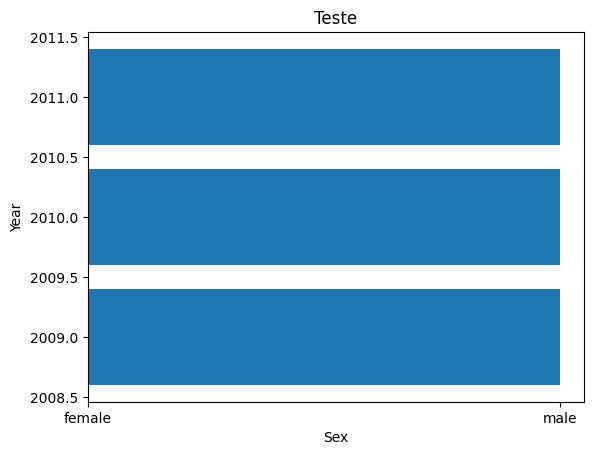

In [65]:
plt.barh(df['Year'], df['Sex'])
plt.xlabel('Sex')
plt.ylabel('Year')
plt.title('Teste')
plt.show()